# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [3]:
df1.columns

Index(['Id', 'game_seq', 'season_end', 'date', 'season_game_seq', 'playoff',
       'team_id', 'Elo', 'opp_team_id', 'opp_Elo', 'win_equivalent',
       'bet_ratio', 'home_crowd', 'opp_crowd', 'total_crowd', 'game_result'],
      dtype='object')

In [4]:
df1.head()

,Id,game_seq,season_end,date,season_game_seq,playoff,team_id,Elo,opp_team_id,opp_Elo,win_equivalent,bet_ratio,home_crowd,opp_crowd,total_crowd,game_result
0,1,39323,1997,11/2/1996,2,False,team25,1511.6364,opp_team10,NaN,NaN,0.616437,6600,4800,11400,1
1,2,59211,2012,6/17/2012,87,True,team22,1690.4612,opp_team42,1732.2164,59.721931,0.583044,5600,4300,9900,0
2,3,60691,2014,11/20/2013,12,False,team18,1550.2258,opp_team11,NaN,NaN,0.606468,8600,3800,12400,0
3,4,31900,1990,3/29/1990,69,False,team12,NaN,opp_team17,1629.6985,39.305004,0.390694,7200,4000,11200,0
4,5,48134,2004,1/2/2004,30,False,team27,NaN,opp_team12,NaN,28.311192,0.492179,8600,4900,13500,0


In [5]:
df1['team_id'] = df1['team_id'].str.extract('(\d+)').astype(int)
df1['opp_team_id'] = df1['opp_team_id'].str.extract('(\d+)').astype(int)
df1['playoff'] = df1['playoff'].replace(False,0)

df2['team_id'] = df2['team_id'].str.extract('(\d+)').astype(int)
df2['opp_team_id'] = df2['opp_team_id'].str.extract('(\d+)').astype(int)
df2['playoff'] = df2['playoff'].replace(False,0)

In [6]:
df1.head()

,Id,game_seq,season_end,date,season_game_seq,playoff,team_id,Elo,opp_team_id,opp_Elo,win_equivalent,bet_ratio,home_crowd,opp_crowd,total_crowd,game_result
0,1,39323,1997,11/2/1996,2,0.0,25,1511.6364,10,NaN,NaN,0.616437,6600,4800,11400,1
1,2,59211,2012,6/17/2012,87,1.0,22,1690.4612,42,1732.2164,59.721931,0.583044,5600,4300,9900,0
2,3,60691,2014,11/20/2013,12,0.0,18,1550.2258,11,NaN,NaN,0.606468,8600,3800,12400,0
3,4,31900,1990,3/29/1990,69,0.0,12,NaN,17,1629.6985,39.305004,0.390694,7200,4000,11200,0
4,5,48134,2004,1/2/2004,30,0.0,27,NaN,12,NaN,28.311192,0.492179,8600,4900,13500,0


In [7]:
import tensorflow as tf

/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

In [8]:
train_data = df1.drop(labels=['Id','team_id','opp_team_id','game_seq','total_crowd'],axis = 1)
test_data = df2.drop(labels=['Id','team_id','opp_team_id','game_seq','total_crowd'],axis = 1)

In [9]:
train_data.head()

,season_end,date,season_game_seq,playoff,Elo,opp_Elo,win_equivalent,bet_ratio,home_crowd,opp_crowd,game_result
0,1997,11/2/1996,2,0.0,1511.6364,NaN,NaN,0.616437,6600,4800,1
1,2012,6/17/2012,87,1.0,1690.4612,1732.2164,59.721931,0.583044,5600,4300,0
2,2014,11/20/2013,12,0.0,1550.2258,NaN,NaN,0.606468,8600,3800,0
3,1990,3/29/1990,69,0.0,NaN,1629.6985,39.305004,0.390694,7200,4000,0
4,2004,1/2/2004,30,0.0,NaN,NaN,28.311192,0.492179,8600,4900,0


In [10]:
y_train = train_data['game_result']
train_data = train_data.drop(labels=['game_result'],axis=1)

In [11]:
train_data.head()

,season_end,date,season_game_seq,playoff,Elo,opp_Elo,win_equivalent,bet_ratio,home_crowd,opp_crowd
0,1997,11/2/1996,2,0.0,1511.6364,NaN,NaN,0.616437,6600,4800
1,2012,6/17/2012,87,1.0,1690.4612,1732.2164,59.721931,0.583044,5600,4300
2,2014,11/20/2013,12,0.0,1550.2258,NaN,NaN,0.606468,8600,3800
3,1990,3/29/1990,69,0.0,NaN,1629.6985,39.305004,0.390694,7200,4000
4,2004,1/2/2004,30,0.0,NaN,NaN,28.311192,0.492179,8600,4900


Wins:  28017
Losses 16983


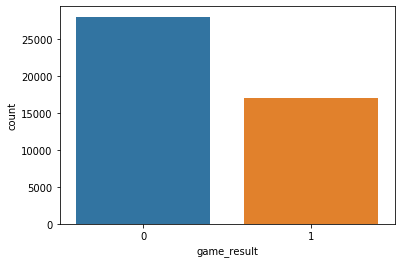

In [12]:
ax = sns.countplot(y_train,label='Count')
win, loss = y_train.value_counts()
print('Wins: ',win)
print('Losses', loss)

In [13]:
y_train

0        1
1        0
2        0
3        0
4        0
        ..
44995    0
44996    0
44997    0
44998    0
44999    1
Name: game_result, Length: 45000, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

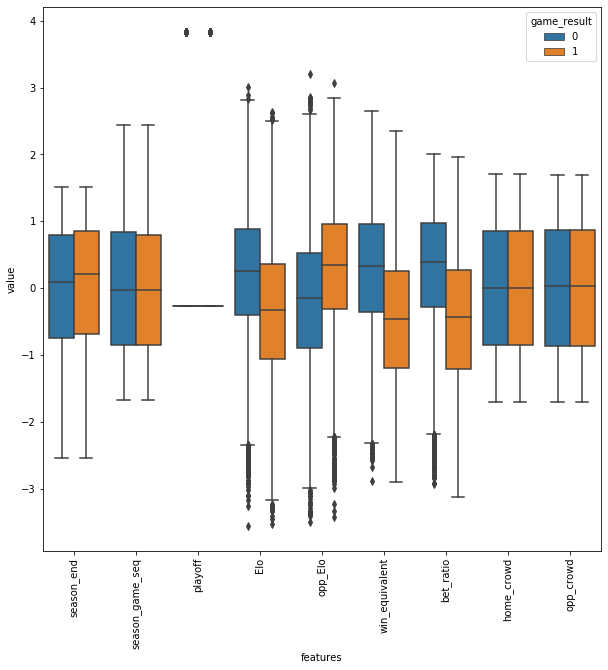

In [14]:
data_dia = y_train
data = train_data.drop(labels=['date'],axis=1)
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y_train,data_n_2],axis=1)
data = pd.melt(data,id_vars = 'game_result',var_name="features",value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x='features', y = 'value',hue='game_result',data = data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

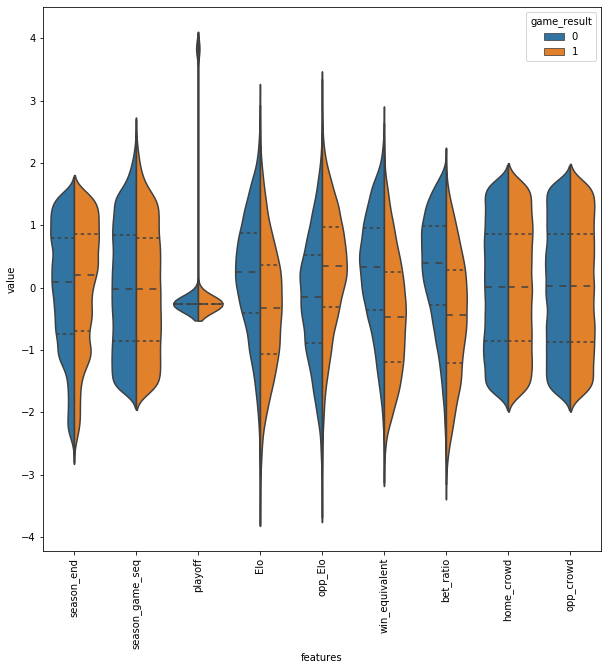

In [15]:
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="game_result", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

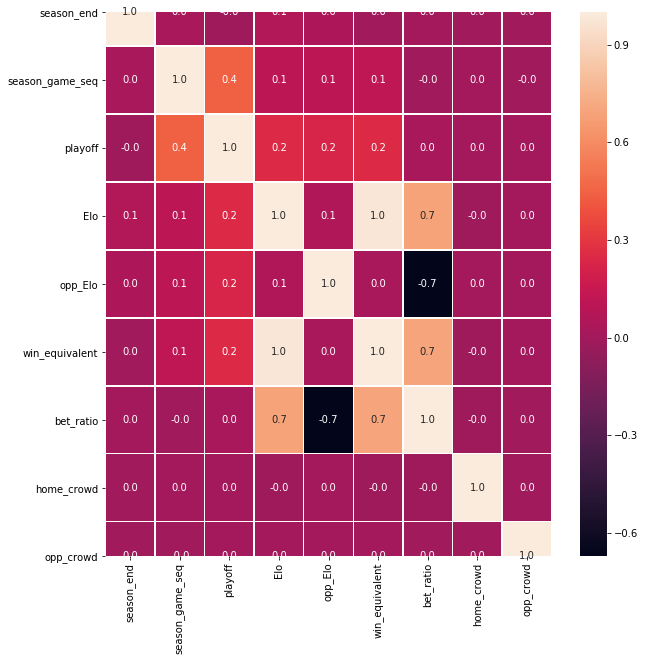

In [16]:
f,ax = plt.subplots(figsize=(10, 10))
data = train_data.drop(labels=['date'],axis=1)

sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [17]:
train_data = train_data.drop(labels=['date'],axis=1)

In [23]:
drop_list = ['win_equivalent','bet_ratio']
X_train = train_data.drop(labels=drop_list,axis=1)
X_test = test_data.drop(labels = drop_list,axis=1)


In [24]:
X_train.head()

,season_end,season_game_seq,playoff,Elo,opp_Elo,home_crowd,opp_crowd
0,1997,2,0.0,1511.6364,NaN,6600,4800
1,2012,87,1.0,1690.4612,1732.2164,5600,4300
2,2014,12,0.0,1550.2258,NaN,8600,3800
3,1990,69,0.0,NaN,1629.6985,7200,4000
4,2004,30,0.0,NaN,NaN,8600,4900


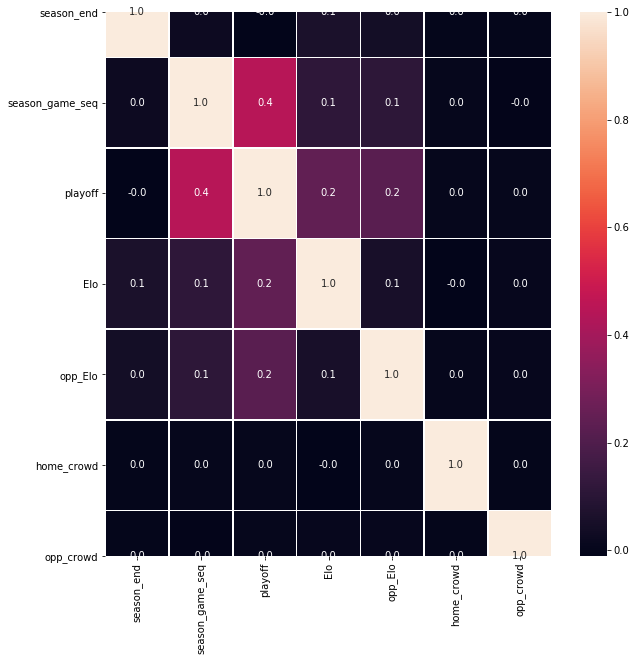

In [25]:

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [29]:
X_test.head()
X_train.drop(labels=['season_end'],inplace=True,axis = 1)
X_test.drop(labels=['season_end'],inplace=True,axis = 1)

In [38]:
#X_train = X_train.drop(labels=['date'],axis = 1)
X_test.drop(labels=['date'],inplace=True,axis = 1)

In [39]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

In [42]:
y_train.count()

45000

In [44]:
X_train['Elo_diff'] = X_train['Elo'] - X_train['opp_Elo']

In [43]:
X_train['player_diff'] = X_train['home_crowd'] - X_train['opp_crowd']
X_test['Elo_diff'] = X_test['Elo'] - X_test['opp_Elo']
X_test['player_diff'] = X_test['home_crowd'] - X_test['opp_crowd']

In [45]:
X_train.drop(labels=['Elo','opp_Elo','home_crowd','opp_crowd'],axis=1,inplace=True)
X_trai.drop(labels=['Elo','opp_Elo','home_crowd','opp_crowd'],axis=1,inplace=True)

,season_game_seq,playoff,Elo,opp_Elo,home_crowd,opp_crowd,player_diff,Elo_diff
0,2,0.0,1511.636400,1501.837726,6600,4800,1800,9.798674
1,87,1.0,1690.461200,1732.216400,5600,4300,1300,-41.755200
2,12,0.0,1550.225800,1501.837726,8600,3800,4800,48.388074
3,69,0.0,1501.184626,1629.698500,7200,4000,3200,-128.513874
4,30,0.0,1501.184626,1501.837726,8600,4900,3700,-0.653100
